## Plotting

With the following code we can import the power dataset with the correct formatting and then plot it

In [1]:
# Importing packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pyarrow
from datetime import datetime, timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.seasonal import STL

In [2]:
# Dataset import from CSV file
#dataset_P = pd.read_csv('../PowerDataset_pivoted.csv', index_col=0, header=[0, 1], parse_dates=True) # 01/21 dataset
dataset_P = pd.read_csv('../PowerDataset_3_years.csv', index_col=0, parse_dates=True) # 2.5 years dataset
dataset_P

,0,1,2,3,4,5,6,7,8,9,...,970,971,972,973,974,975,976,977,978,979
timestamp,,,,,,,,,,,,,,,,,,,,,
2020-05-02 17:00:00+00:00,530.882353,20.000000,529.444444,550.606061,577.948718,528.611111,568.571429,669.487179,574.857143,547.297297,...,512.000000,525.294118,530.294118,527.837838,521.142857,530.285714,526.756757,561.315789,539.705882,526.000000
2020-05-02 18:00:00+00:00,532.025641,20.000000,529.042791,548.348292,575.650935,527.948171,571.401899,667.741604,573.162629,546.831131,...,511.356838,527.112341,530.396878,527.295592,520.331584,530.313347,527.160159,562.404254,539.750465,524.765520
2020-05-02 19:00:00+00:00,541.962608,20.000000,532.534305,554.683586,581.220896,527.629587,571.127541,670.140471,573.512427,547.244151,...,511.393428,525.655454,530.244126,528.170642,520.270270,530.186054,525.208819,560.954731,537.384654,525.631471
2020-05-02 20:00:00+00:00,544.268327,20.000000,532.654562,557.141766,586.214043,529.118962,571.603887,674.412953,576.784291,547.738046,...,511.756579,527.205914,530.569659,527.977996,520.715861,530.500481,524.167448,560.610850,537.646236,525.149199
2020-05-02 21:00:00+00:00,542.883504,20.000000,533.145359,556.479451,587.117900,528.839406,572.772164,675.122225,576.477301,548.337485,...,512.915703,529.027778,530.596706,529.074976,522.041521,530.186054,527.420255,563.308303,539.427887,525.096847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-28 18:00:00+00:00,532.969697,541.555556,526.484848,550.388889,576.042929,520.782828,571.000000,549.944444,566.535354,535.333333,...,1204.111111,841.996212,1155.944444,1583.000000,869.055556,1193.555556,779.055556,745.944444,1196.444444,1255.888889
2022-09-28 19:00:00+00:00,533.333333,541.111111,527.333333,550.611111,577.055556,520.333333,567.500000,549.333333,567.055556,536.277778,...,1205.000000,703.944444,1173.000000,1593.166667,868.833333,1196.000000,670.000000,635.777778,1201.000000,1251.611111
2022-09-28 20:00:00+00:00,532.555556,541.277778,526.555556,548.944444,575.722222,520.888889,570.000000,550.444444,566.166667,535.611111,...,1203.944444,863.444444,1175.166667,1587.444444,708.833333,1195.555556,610.888889,902.000000,1195.222222,1245.722222


We assumed that, in those periods of time in which the samples were null, the system was inactive, which means that inserting 0 as value is a good approximation

In [3]:
# Function that plots a specific node or set of nodes
def showplot(dataset_node, size, label):
    plt.figure(figsize=size)
    plt.tight_layout() 
    plt.grid(True)
    plt.ylabel('W')
    plt.title('Power')
    plt.plot(dataset_node, linewidth=2, label=label)
    plt.legend()
    plt.show

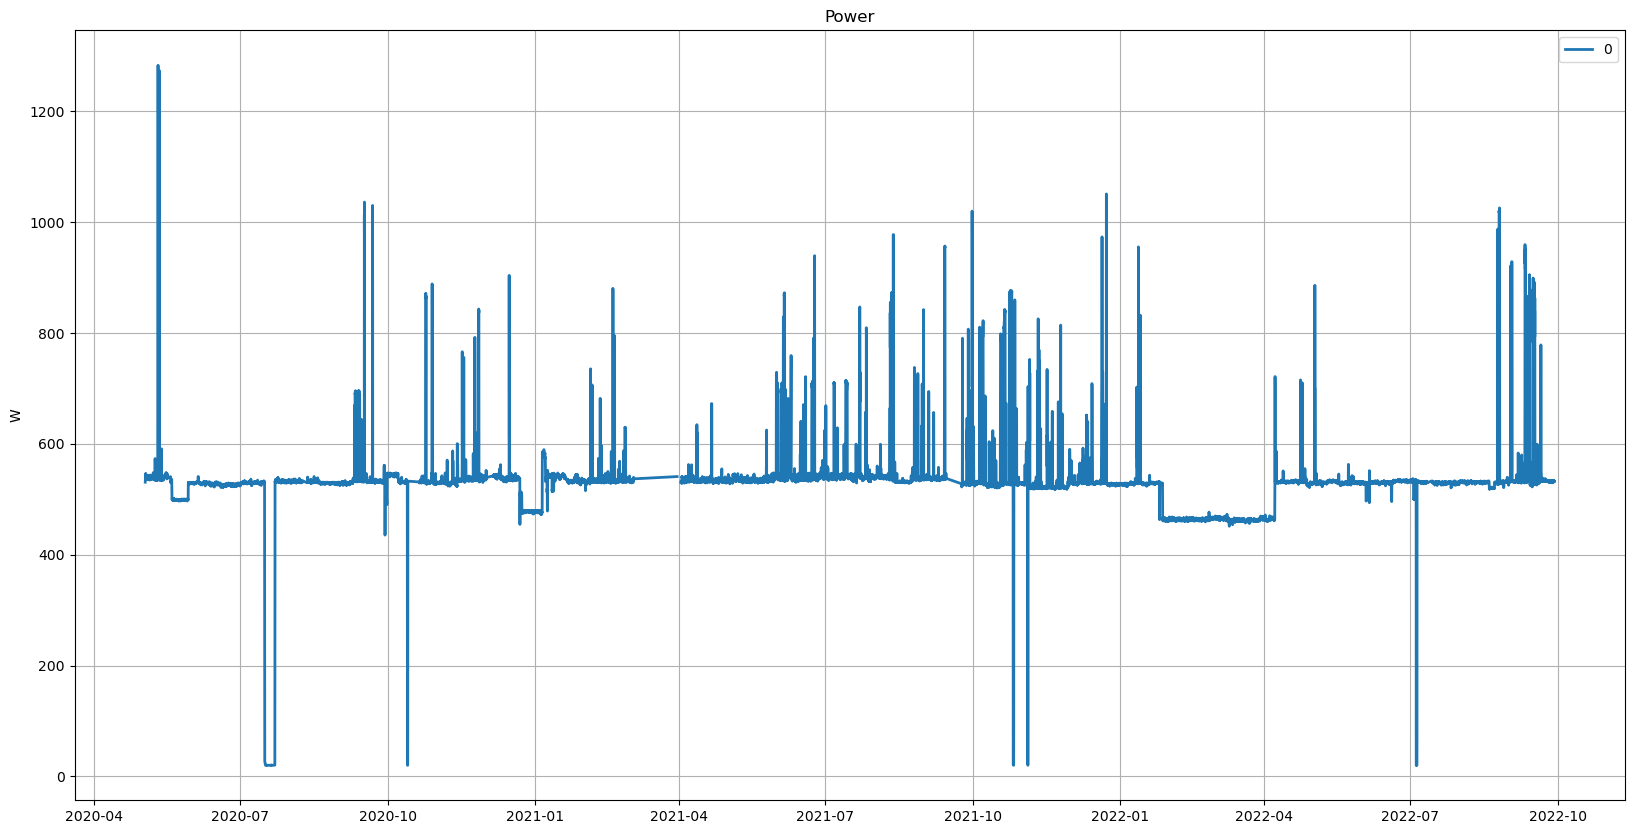

In [4]:
# Plotting specific nodes in time
#showplot(dataset_P['value']['0'], (20,10)) # 01/21 dataset
showplot(dataset_P['0'], (20,10), dataset_P.columns[0]) # 2.5 years dataset

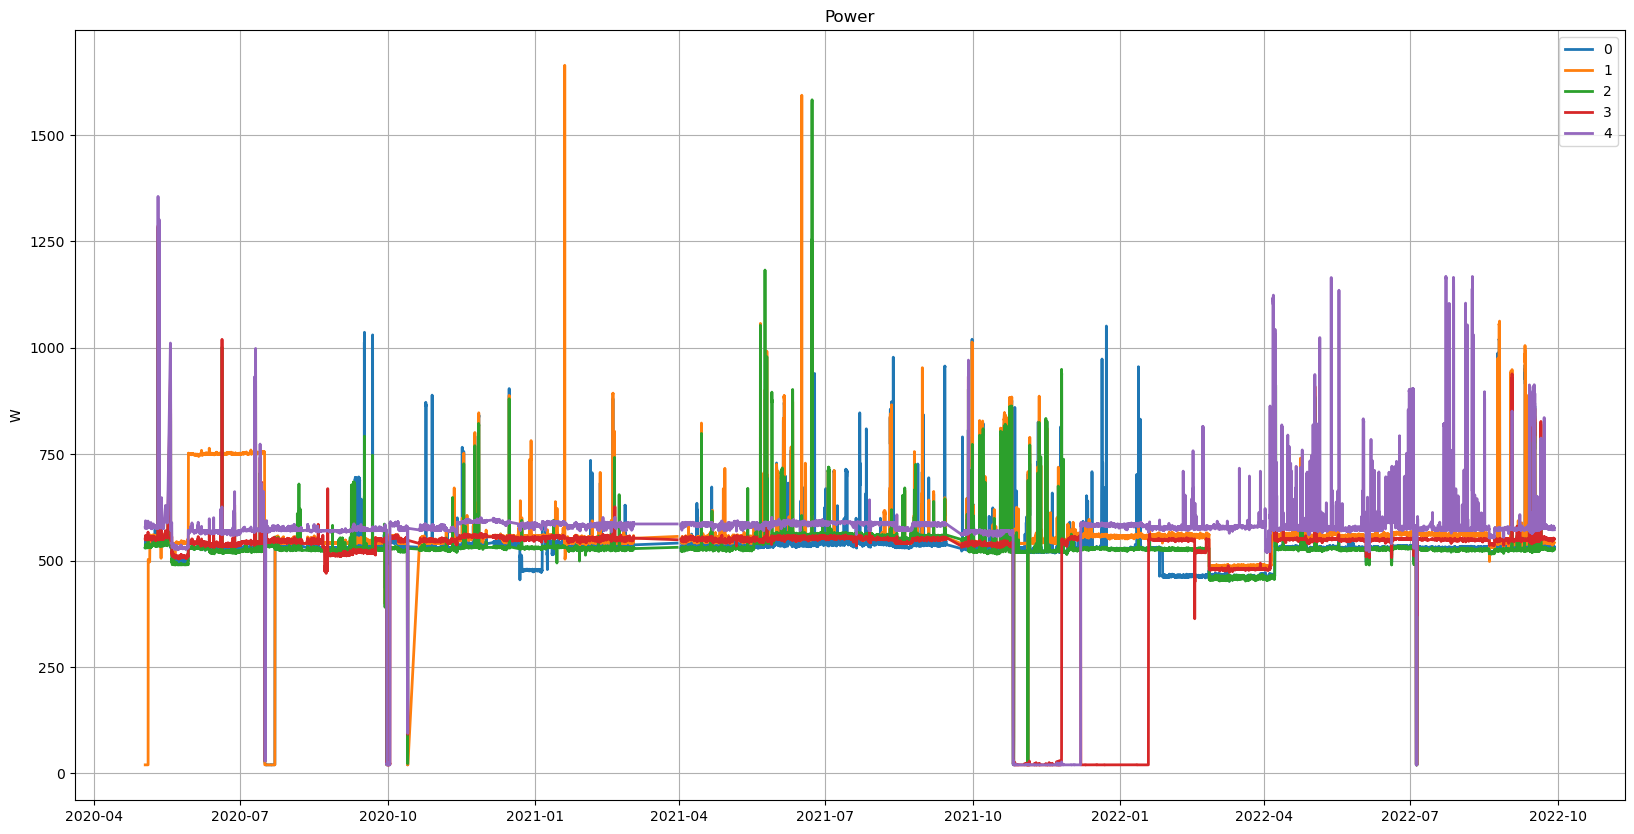

In [5]:
# Plotting a set of nodes in time
#showplot(dataset_P['value'].iloc[:, 0:5], (20,10)) # 01/21 dataset
showplot(dataset_P.iloc[:, 0:5], (20,10), dataset_P.columns[0:5]) # 2.5 years dataset

# Plotting a portion in time of the dataset
#showplot(dataset_P.iloc[700:1500, 0], (20,10), dataset_P.columns[0])


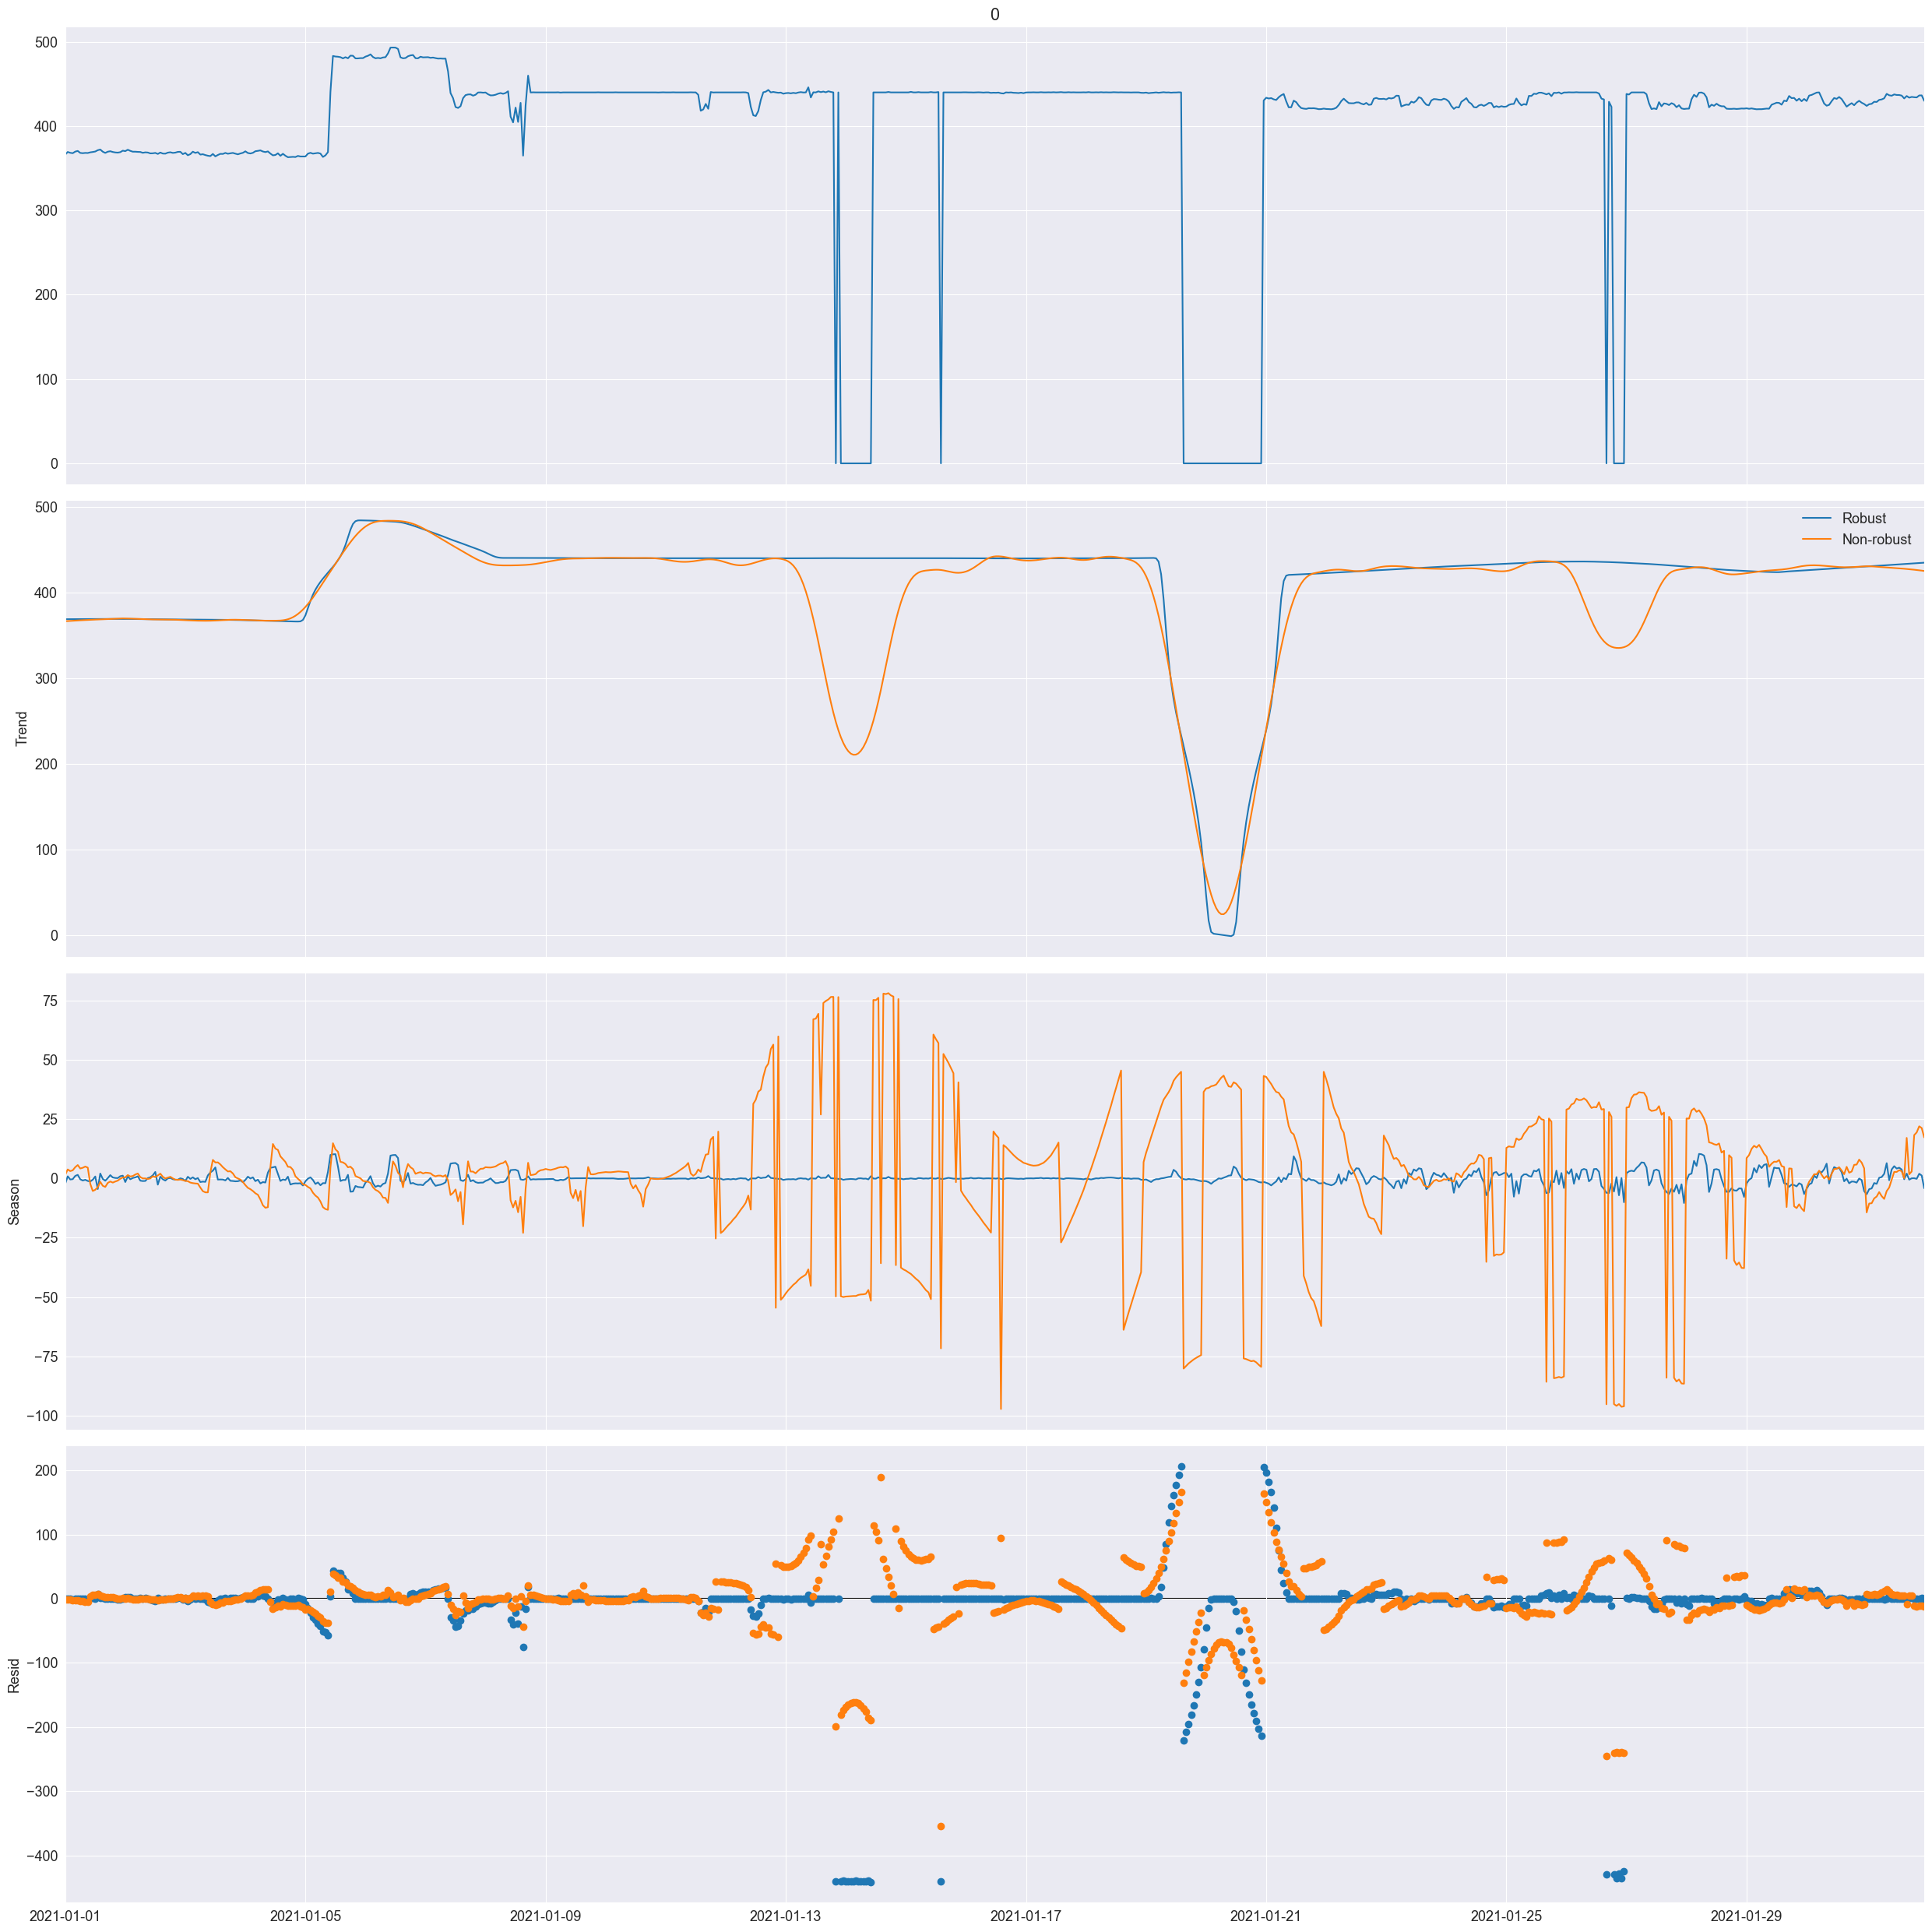

In [21]:
# Seasonal-Trend Decomposition for 01/21 dataset
register_matplotlib_converters()
sns.set_style("darkgrid")

plt.rc("figure", figsize=(25, 25))
plt.rc("font", size=13)

def add_stl_plot(fig, res, legend):
    """Add 3 plots from a second STL fit"""
    axs = fig.get_axes()
    comps = ["trend", "seasonal", "resid"]
    for ax, comp in zip(axs[1:], comps):
        series = getattr(res, comp)
        if comp == "resid":
            ax.plot(series, marker="o", linestyle="none")
        else:
            ax.plot(series)
            if comp == "trend":
                ax.legend(legend, frameon=False)

stl = STL(dataset_P['value']['0'], period=24, robust=True)  # the period is set to one day
res_robust = stl.fit()
fig = res_robust.plot()
res_non_robust = STL(dataset_P['value']['0'], period=24, robust=False).fit()
add_stl_plot(fig, res_non_robust, ["Robust", "Non-robust"])

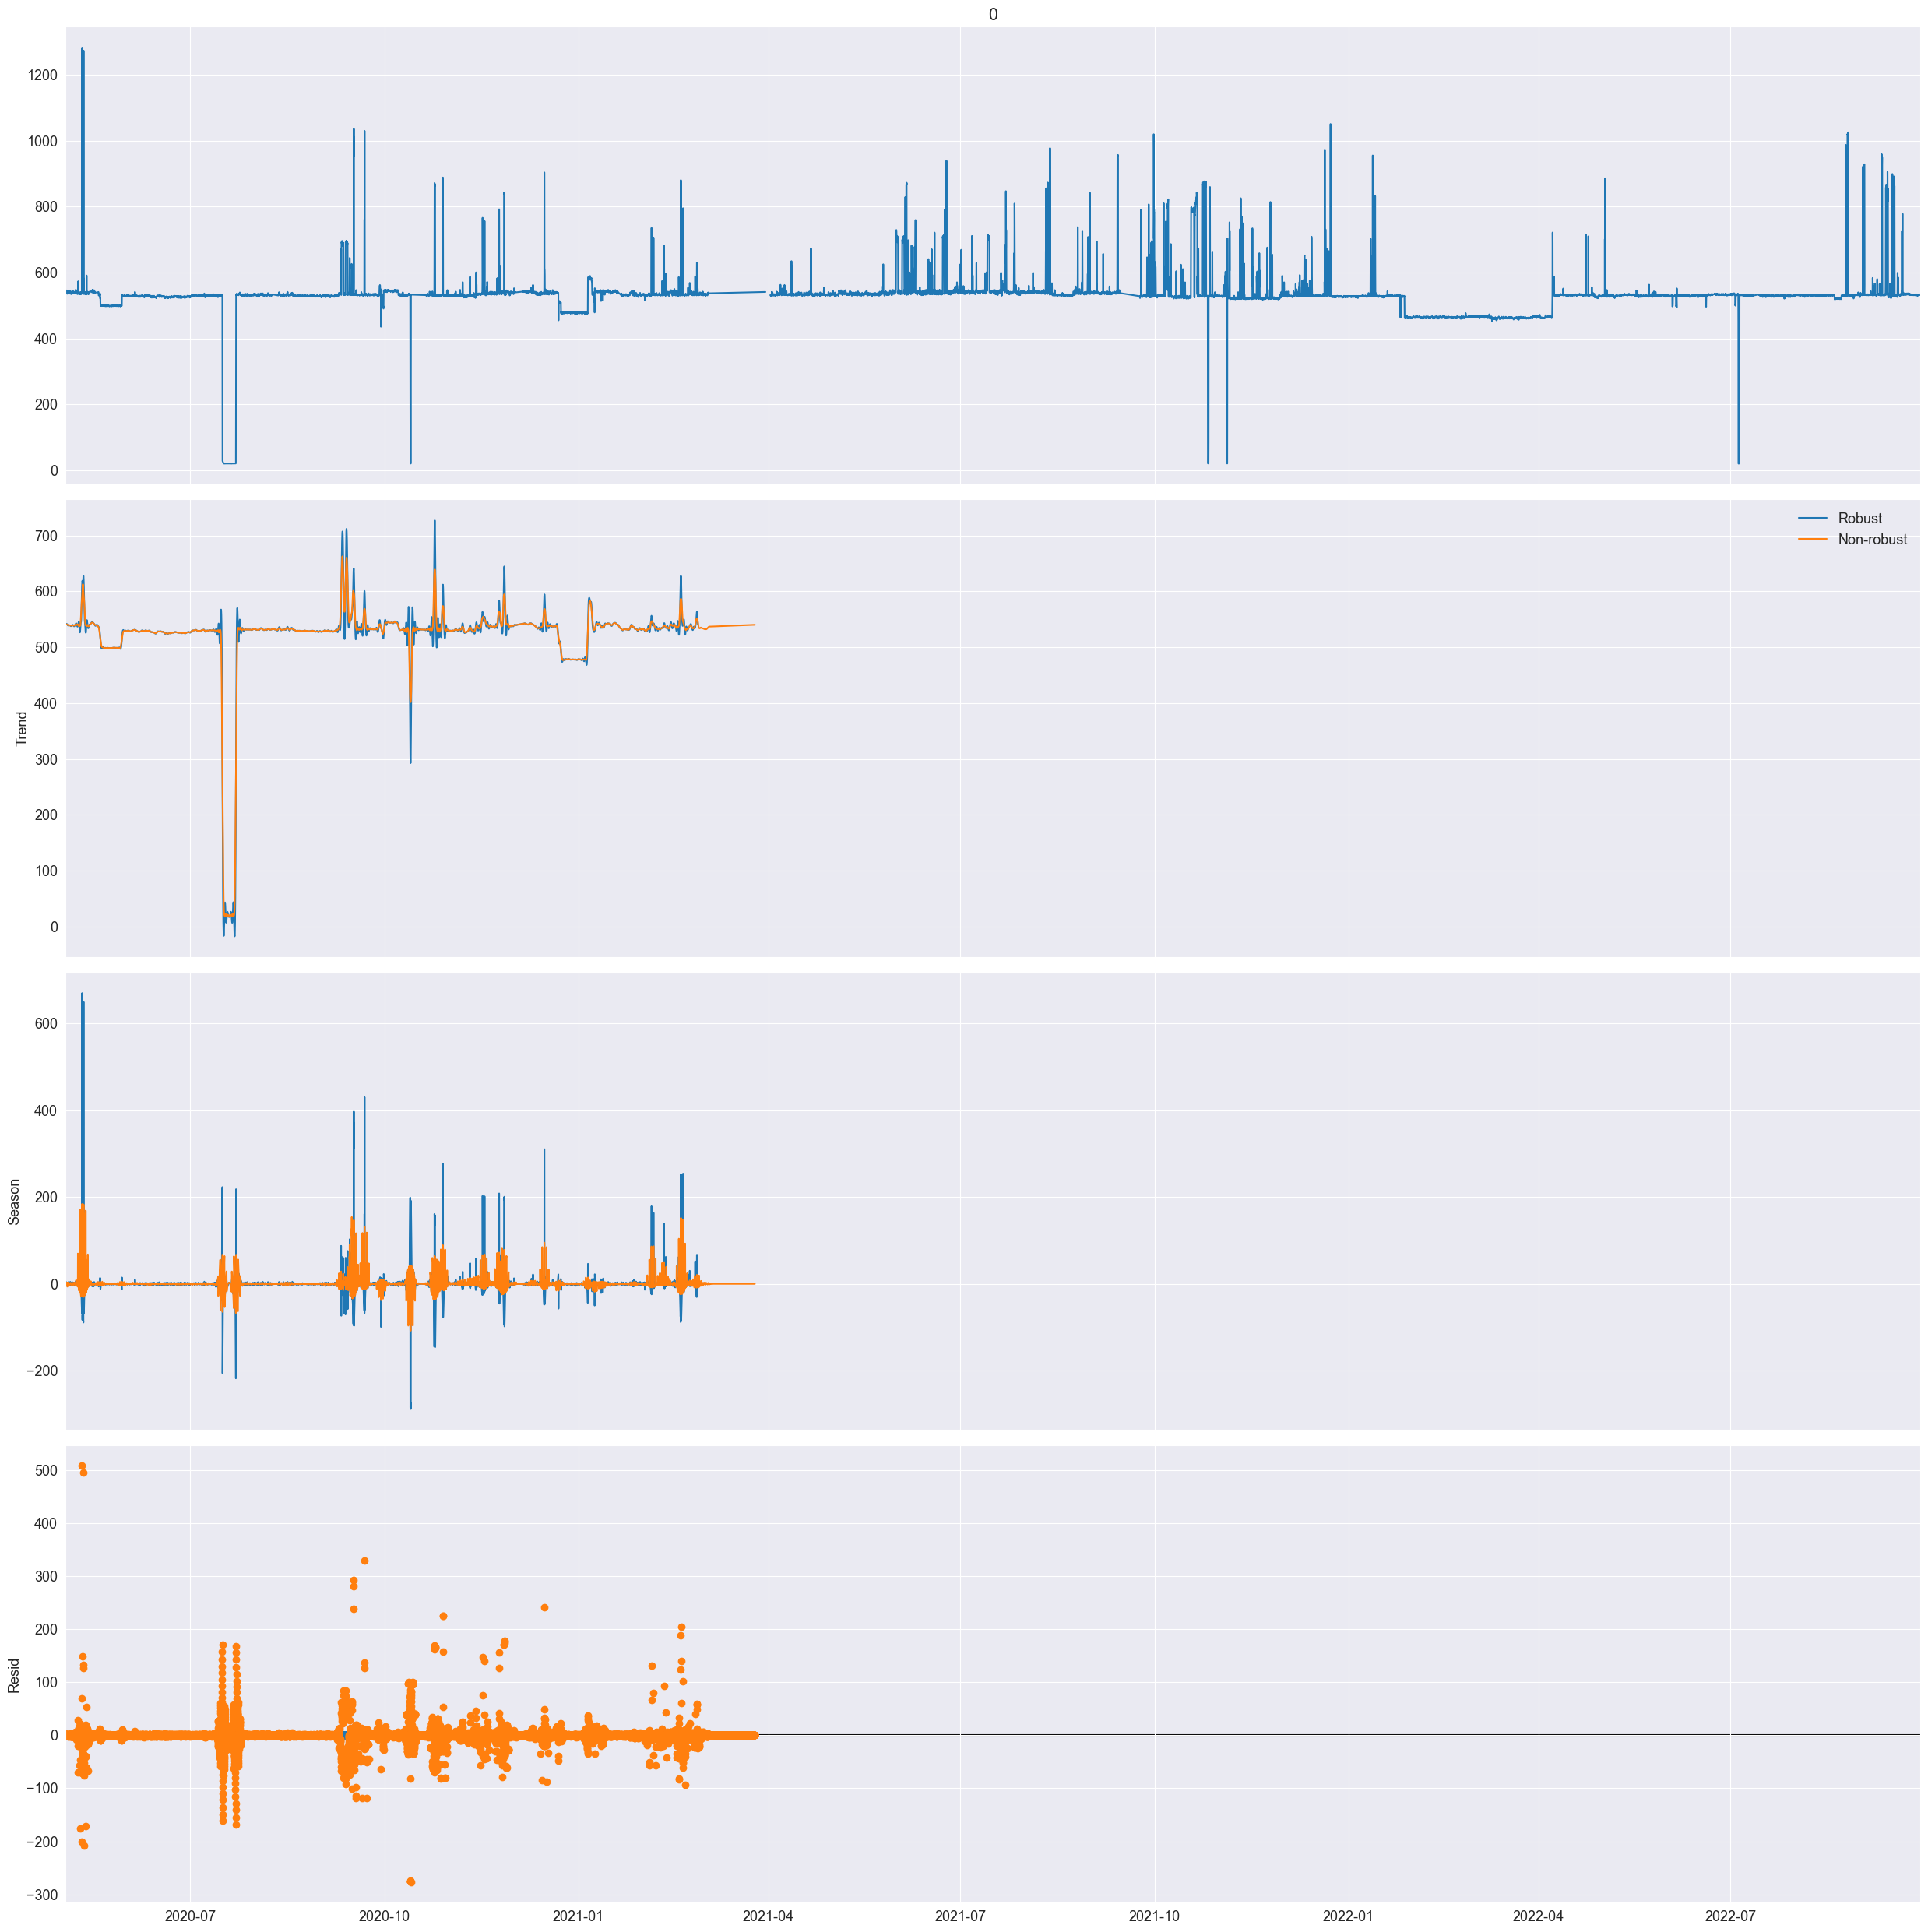

In [6]:
# Seasonal-Trend Decomposition for 2.5 years dataset
register_matplotlib_converters()
sns.set_style("darkgrid")

plt.rc("figure", figsize=(25, 25))
plt.rc("font", size=13)

def add_stl_plot(fig, res, legend):
    """Add 3 plots from a second STL fit"""
    axs = fig.get_axes()
    comps = ["trend", "seasonal", "resid"]
    for ax, comp in zip(axs[1:], comps):
        series = getattr(res, comp)
        if comp == "resid":
            ax.plot(series, marker="o", linestyle="none")
        else:
            ax.plot(series)
            if comp == "trend":
                ax.legend(legend, frameon=False)

stl = STL(dataset_P['0'], period=24, robust=True)  # the period is set to one day
res_robust = stl.fit()
fig = res_robust.plot()
res_non_robust = STL(dataset_P['0'], period=24, robust=False).fit()
add_stl_plot(fig, res_non_robust, ["Robust", "Non-robust"])

<Axes: xlabel='timestamp'>

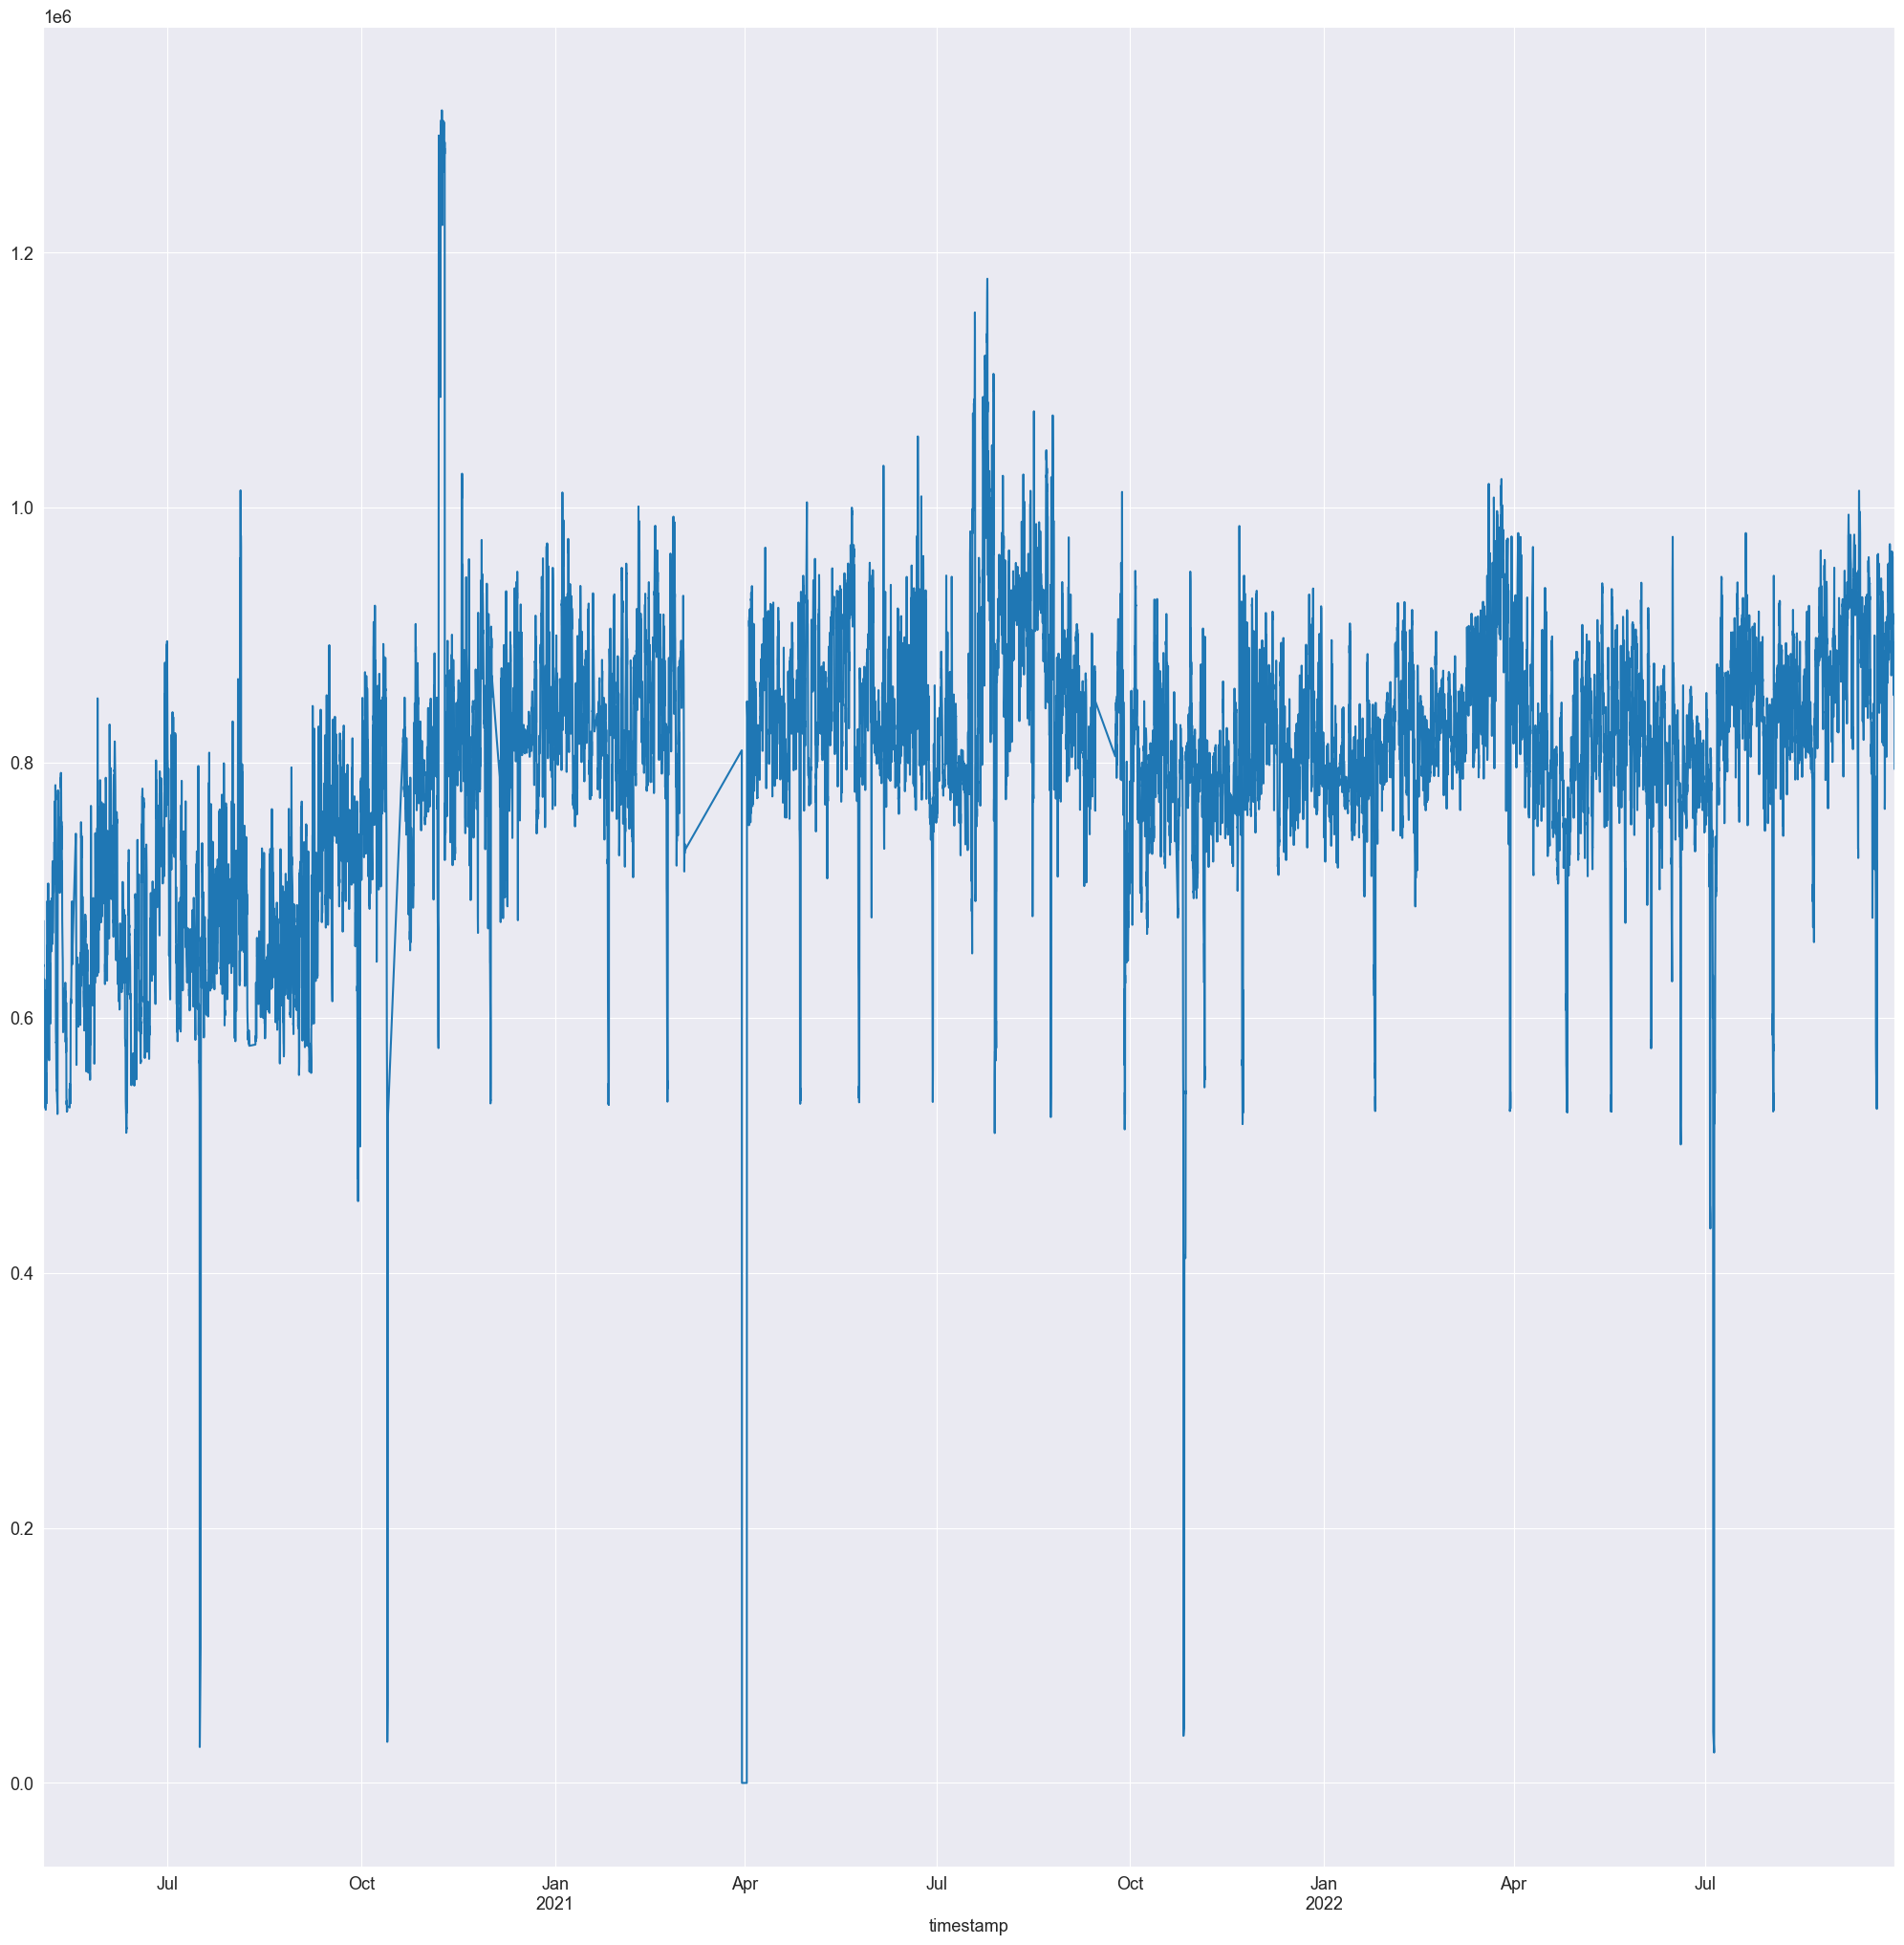

In [7]:
# To get (and plot) the total power consumption for all nodes, each sample of time
dataset_P.sum(axis=1).plot()